- Ana Luisa Parra Valencia
- Jorge Iván Pinzón
- Miguel Ángel Nava Pérez

Parte 1

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        96
           1       0.61      0.53      0.57        58

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.69      0.69      0.69       154



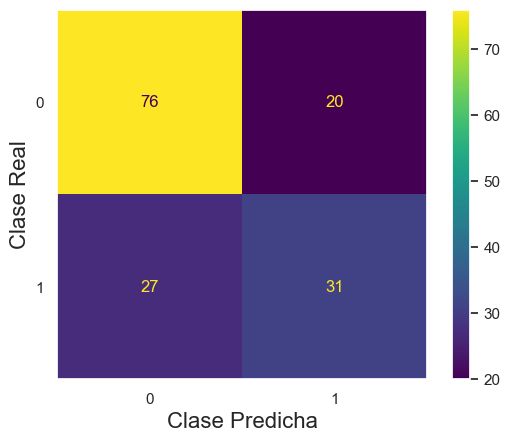

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import validation_curve, learning_curve
import pandas as pd

df_completo = pd.read_csv("diabetes.csv")
# División en entrenamiento y prueba
df = df_completo.sample(frac=0.8, random_state=42)   # datos de entrenamiento
df_prueba = df_completo.drop(df.index)               # datos de prueba

cosas_borrar = ["Outcome"]
# Separar X e Y de entrenamiento
y_train = df["Outcome"]
X_train = df.drop(cosas_borrar, axis=1)

# Separar X e Y de prueba
y_test = df_prueba["Outcome"]
X_test = df_prueba.drop(cosas_borrar, axis=1)

model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

model = model.fit(X_train,y_train) # luego generamos el modelo y lo ajustamos a lo datos

#generemos otros datos aleatorios para clasificarlos con el modelo, es decir, 

y_pred = model.predict(X_test) #predecimos el label para los nuevos X usando el modelo

probs = model.predict_proba(X_test)

#Reporta de clasificación
#presente las metricas de: accuracy, recall, precision y F1

print("Reporte de clasificación:")

print(classification_report(y_test, y_pred))

#Matriz de confusión 

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
#disp.ax_.axes.texts._axes.set_xlabel(fontsize=20)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()

El mejor valor de K es: 3


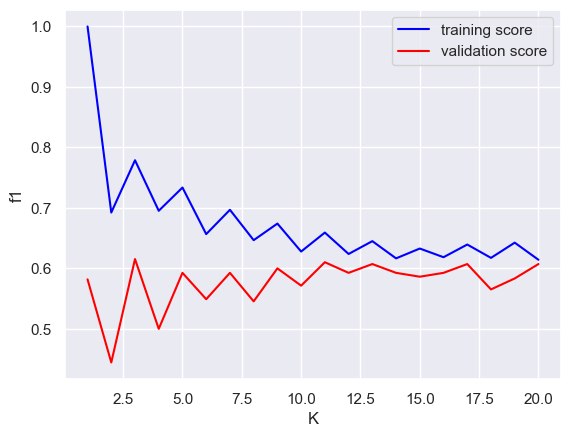

In [4]:
#curva de validación para selección del K 
X_train=zscore(X_train)
X_test=zscore(X_test)
k = np.arange(1, 21) # veamos para diferentes valores de grados

train_score, val_score = validation_curve(KNeighborsClassifier(),
                                           zscore(df_completo.drop("Outcome",axis=1)), df_completo["Outcome"],
                                          param_name='n_neighbors',scoring='f1',
                                          param_range=k, cv=9) 
#para saber las opciones de param_name se requeire conocer las opciones que tiene KNeighborsClassifier con el método model.get_params()
#validation_curve, retorna la metrica que se asinge en scoring, para los datos de entrenamiento y de validación

plt.plot(k, np.median(train_score, axis=1), color='blue', 
         label='training score') #graficamos el promedios del parámetro de entrenamietno, y el de validación 

plt.plot(k, np.median(val_score, axis=1), color='red', 
         label='validation score') #graficamos el promedio de los parámetros de validación o prueba
plt.legend(loc='best')
#plt.ylim(0, 1)
plt.xlabel('K')
plt.ylabel('f1')

better_K = k[np.argmax(np.median(val_score,axis=1))] #buscamos dónde ocurre el máx en la curva
# de la curva de validación

print(f'El mejor valor de K es: {better_K}')

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        96
           1       0.66      0.50      0.57        58

    accuracy                           0.71       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.71      0.70       154



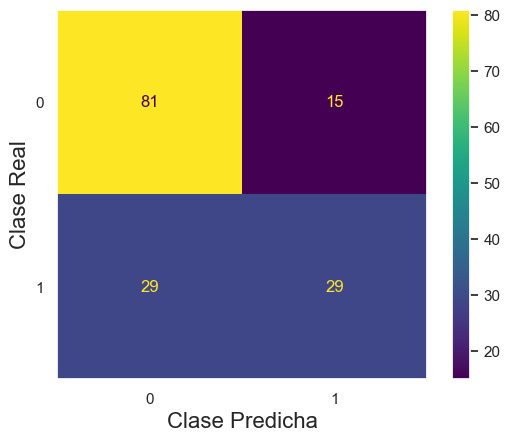

In [6]:

X_train=zscore(X_train)
X_test=zscore(X_test)

model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

model = model.fit(X_train,y_train) # luego generamos el modelo y lo ajustamos a lo datos

#generemos otros datos aleatorios para clasificarlos con el modelo, es decir, 

y_pred = model.predict(X_test) #predecimos el label para los nuevos X usando el modelo

probs = model.predict_proba(X_test)

# Reporta de clasificación
#presente las metricas de: accuracy, recall, precision y F1

print("Reporte de clasificación:")

print(classification_report(y_test, y_pred))

#Matriz de confusión 

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
#disp.ax_.axes.texts._axes.set_xlabel(fontsize=20)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()


en base a lo observado, si se puede usar como un generador de características, a continuación procedemos a crearla, la cual es el score de el modelo

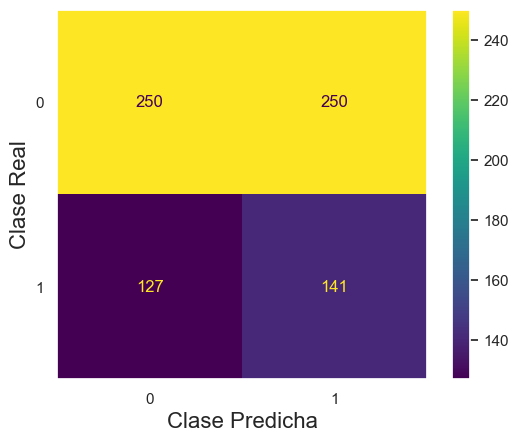

In [7]:
df_completo["Resultado Modelo"] = model.predict(df_completo.drop("Outcome",axis=1))
y_total = df_completo["Resultado Modelo"]

conf_matrix = confusion_matrix(df_completo["Outcome"], y_total)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
#disp.ax_.axes.texts._axes.set_xlabel(fontsize=20)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_completo.drop(["Outcome","Resultado Modelo"],axis=1)
y = df_completo["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
tree = DecisionTreeClassifier().fit(X_train, y_train)

y_predichoo = tree.predict(X_test)
print(classification_report(y_test,y_predichoo ))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        95
           1       0.59      0.56      0.57        59

    accuracy                           0.68       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.68      0.68      0.68       154



El desempeño del modelo de arbol es decente, ya que se obtuvo una presición general de 0.73 en el f1 score

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        95
           1       0.74      0.49      0.59        59

    accuracy                           0.74       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154



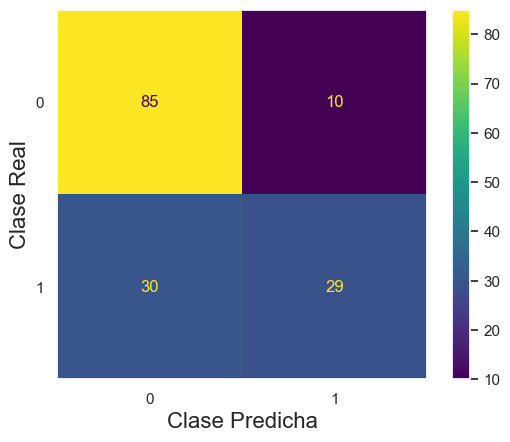

In [9]:
##Random forest

rango = np.arange(50,301 , step=10)
for i in rango:

    model = RandomForestClassifier(n_estimators=i, random_state=0, max_samples=0.8).fit(X_train,y_train)

    #validación 

    y_pred =model.predict(X_test)

 #   print("Reporte de clasificación:")

 #   print(classification_report(y_test, y_pred))
    reporte = classification_report(y_test, y_pred)

print(reporte)
#Matriz de confusión 

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
disp.ax_.grid(0)
#disp.ax_.axes.texts._axes.set_xlabel(fontsize=20)
plt.xlabel('Clase Predicha',fontsize=16)
plt.ylabel('Clase Real',fontsize=16)
plt.show()
